# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score, fbeta_score
from sklearn.metrics import roc_auc_score


#MODEL
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV

from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE

import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.metrics import roc_curve
from sklearn import svm


## Clean Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/Data_Dummy2.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE,TOTALAREA_MODE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,8.0,0.0149,26.0,NaN,10.0,6.0,4.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,3.0,0.0714,46.0,4.0,4.0,1.0,3.0
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,8.0,NaN,53.0,1.0,12.0,7.0,3.0
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,8.0,NaN,53.0,9.0,27.0,7.0,NaN
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,3.0,NaN,55.0,9.0,12.0,10.0,4.0


In [5]:
#observe the different feature type present in the data

print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: SK_ID_CURR                     float64
TARGET                         float64
NAME_CONTRACT_TYPE             float64
CODE_GENDER                    float64
FLAG_OWN_CAR                   float64
FLAG_OWN_REALTY                float64
CNT_CHILDREN                   float64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE               float64
NAME_EDUCATION_TYPE            float64
NAME_FAMILY_STATUS             float64
NAME_HOUSING_TYPE              float64
REGION_POPULATION_RELATIVE     float64
FLAG_MOBIL                     float64
FLAG_EMP_PHONE                 float64
FLAG_WORK_PHONE                float64
FLAG_CONT_MOBILE               float64
FLAG_PHONE                     float64
FLAG_EMAIL                     float64
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT           float64
REGION_RATING_CLIEN

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE,TOTALAREA_MODE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,8.0,0.0149,26.0,NaN,10.0,6.0,4.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,3.0,0.0714,46.0,4.0,4.0,1.0,3.0
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,8.0,NaN,53.0,1.0,12.0,7.0,3.0
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,8.0,NaN,53.0,9.0,27.0,7.0,NaN
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,3.0,NaN,55.0,9.0,12.0,10.0,4.0


In [6]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
REGION_RATING_CLIENT_W_CITY,229484,74.626274
REGION_RATING_CLIENT,226984,73.813294
CNT_FAM_MEMBERS,158359,51.497020
TOTALAREA_MODE,148431,48.268517
AMT_REQ_CREDIT_BUREAU_YEAR,91711,29.823649
YEARS_EMPLOYED,87219,28.362888
YEARS_LAST_PHONE_CHANGE,57622,18.738191
AMT_REQ_CREDIT_BUREAU_QRT,55931,18.188292
AMT_REQ_CREDIT_BUREAU_MON,46905,15.253113
AMT_REQ_CREDIT_BUREAU_WEEK,41718,13.566344


# **Observing the distribution of our classes**

the correlation between 'REG_REGION_NOT_WORK_REGION' and 'LIVE_REGION_NOT_WORK_REGION' is quite high.
and according to the barchart, the distribution is quite similar, so we just keep one feature in df and the REG NOT LIVE have strong correlation with REG NOT REGION, so REG NOT WORK have more similar infomation, for reduce info loss, we choose drop REG NOT WORK

In [7]:
"""
This code calculates the number of transactions that are classified as "Fraudulent" and "Non-Fraudulent" in a given DataFrame "df".
It then computes the percentage of each TARGET and stores it in "normal_share" and "fraud_share" variables, respectively.
Finally, it prints out the percentage of Non-Fraudulent and Fraudulent transactions in the DataFrame using a formatted string.
"""

classes=df['TARGET'].value_counts()
normal_share=round(classes[0]/df['TARGET'].count()*100,2)
fraud_share=round(classes[1]/df['TARGET'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

print("==============================================")
"""
This code computes the percentage of normal and
fraudulent transactions in the dataset, and calculates the imbalance percentage between the two.
The input is a Pandas dataframe "df" containing transaction data, with a column "TARGET"
indicating whether the transaction is normal (0) or fraudulent (1).
The output includes the percentage of normal transactions and fraudulent transactions,
as well as the imbalance percentage between the two.
The imbalance percentage is calculated by dividing the percentage of fraudulent transactions by
the percentage of normal transactions, and multiplying the result by 100.
"""

classes=df['TARGET'].value_counts()
normal_share=classes[0]/df['TARGET'].count()*100
fraud_share=classes[1]/df['TARGET'].count()*100

print(" Normal_share=",normal_share,"\n","Fraud_share=",fraud_share)
print("==============================================")

imbalance= (fraud_share/normal_share)*100
print(' Imbalance Percentage = ' + str(imbalance))

Non-Fraudulent : 91.93 %
    Fraudulent : 8.07 %
 Normal_share= 91.92711805431351 
 Fraud_share= 8.072881945686495
 Imbalance Percentage = 8.781828601345662


<Figure size 2000x600 with 0 Axes>

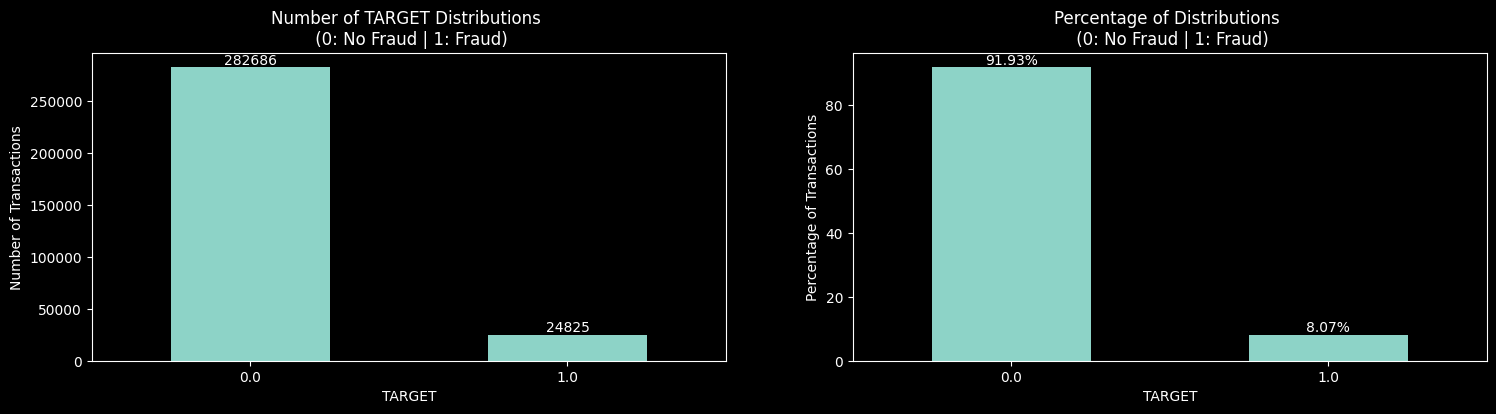

In [8]:

"""
The code creates a figure that displays two subplots side by side,
with the left subplot showing the number of transactions in each TARGET (0 or 1)
and the right subplot showing the percentage of transactions in each TARGET.
The face color of the figure is set to magenta using the 'facecolor' parameter.
The code then creates bar charts for the two subplots using the 'plot' method
of the pandas DataFrame 'classes'. The y-axis label of the left subplot is set
to 'Number of Transactions', and the x-axis label is set to 'TARGET', with a
title of 'Number of TARGET Distributions'. Similarly, the y-axis label of the
right subplot is set to 'Percentage of Transactions', and the x-axis label is
set to 'TARGET', with a title of 'Percentage of Distributions'.
The code then adds labels to the bars of both subplots using the 'bar_label'
method. Finally, the figure is displayed using the 'show' method of pyplot.
"""

with plt.style.context('dark_background'):
    plt.figure(figsize=(20,6), facecolor='m')

    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    classes.plot(kind='bar', rot=0, ax=ax[0])
    ax[0].set_title('Number of TARGET Distributions \n (0: No Fraud | 1: Fraud)')
    ax[0].set_ylabel('Number of Transactions')
    ax[0].set_xlabel('TARGET')

    for i in ax[0].containers:
        ax[0].bar_label(i, label_type='edge', labels=i.datavalues.astype(int))

    (classes/df['TARGET'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
    ax[1].set_title('Percentage of Distributions \n (0: No Fraud | 1: Fraud)')
    ax[1].set_ylabel('Percentage of Transactions')
    ax[1].set_xlabel('TARGET')

    for i in ax[1].containers:
        ax[1].bar_label(i, label_type='edge', labels=[f'{val:.2f}%' for val in i.datavalues])

    plt.show()

* ## Observation

   * The dataset has very high class imbalance. Only 13,586 records are there among 165,100 records which are labeld as fradudulent transaction.
   * The percentage of distribution for majority class is 99.83%91.77%  and minority class is 8.23%
   
   (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)1 is

* ## Observation
We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

In [9]:
df_float = df.select_dtypes('float')
df_float.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
NAME_CONTRACT_TYPE,307511.0,0.095213,0.293509,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CODE_GENDER,307507.0,0.341648,0.474263,0.00000,0.000000,0.00000,1.000000,1.000000e+00
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.00000,0.000000,0.00000,1.000000,1.000000e+00
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.00000,0.000000,1.00000,1.000000,1.000000e+00
CNT_CHILDREN,280762.0,0.266240,0.556478,0.00000,0.000000,0.00000,0.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05


In [10]:
def meta_data(df):
    # สร้าง DataFrame เพื่อเก็บคุณสมบัติและลักษณะของข้อมูล
    data_info = pd.DataFrame(df.dtypes, columns=['Data_Type'])
    data_info['Unique'] = df.nunique()
    data_info['Missing_Values'] = df.isnull().sum()
    data_info['Percent_Null'] = (data_info['Missing_Values'] / len(df)) * 100
    data_info = data_info.sort_values(by='Percent_Null', ascending=False)

    return data_info
prev_meta_data = meta_data(df)
prev_meta_data.reset_index(drop=False).head(40)


,index,Data_Type,Unique,Missing_Values,Percent_Null
0,REGION_RATING_CLIENT_W_CITY,float64,2,229484,74.626274
1,REGION_RATING_CLIENT,float64,2,226984,73.813294
2,CNT_FAM_MEMBERS,float64,16,158359,51.497020
3,TOTALAREA_MODE,float64,5116,148431,48.268517
4,AMT_REQ_CREDIT_BUREAU_YEAR,float64,24,91711,29.823649
5,YEARS_EMPLOYED,float64,50,87219,28.362888
6,YEARS_LAST_PHONE_CHANGE,float64,12,57622,18.738191
7,AMT_REQ_CREDIT_BUREAU_QRT,float64,10,55931,18.188292
8,AMT_REQ_CREDIT_BUREAU_MON,float64,23,46905,15.253113
9,AMT_REQ_CREDIT_BUREAU_WEEK,float64,8,41718,13.566344


In [11]:
# ลบคอลัมน์ที่มีค่าที่คุณต้องการ (ในที่นี้คือ NaN) ออกจาก DataFrame
df = df.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE' ,'DEF_30_CNT_SOCIAL_CIRCLE' ,'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT_W_CITY',
                      'REGION_RATING_CLIENT','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR'])

In [12]:
# ลบคอลัมน์ที่มีค่าที่คุณต้องการ (ในที่นี้คือ NaN) ออกจาก DataFrame
df = df.drop(columns=['YEARS_ID_PUBLISH' ,'YEARS_REGISTRATION','TOTALAREA_MODE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  float64
 3   CODE_GENDER                  307507 non-null  float64
 4   FLAG_OWN_CAR                 307511 non-null  float64
 5   FLAG_OWN_REALTY              307511 non-null  float64
 6   CNT_CHILDREN                 280762 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307506 non-null  float64
 12  NAME_EDUCATION_TYPE          297234 non-null  float64
 13 

In [14]:
df.shape

(307511, 32)

In [15]:
#ดรอปค่า null
# ตรวจสอบว่า DataFrame ถูกสร้างและไม่ใช่ 'None'
if df is not None:
    # ลบแถวที่มีค่า NaN ในคอลัมน์ 'gender' และแก้ไข DataFrame ในที่เดียว
    df.dropna(inplace=True)
else:
    print("DataFrame is not created or is None.")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165100 entries, 1 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   165100 non-null  float64
 1   TARGET                       165100 non-null  float64
 2   NAME_CONTRACT_TYPE           165100 non-null  float64
 3   CODE_GENDER                  165100 non-null  float64
 4   FLAG_OWN_CAR                 165100 non-null  float64
 5   FLAG_OWN_REALTY              165100 non-null  float64
 6   CNT_CHILDREN                 165100 non-null  float64
 7   AMT_INCOME_TOTAL             165100 non-null  float64
 8   AMT_CREDIT                   165100 non-null  float64
 9   AMT_ANNUITY                  165100 non-null  float64
 10  AMT_GOODS_PRICE              165100 non-null  float64
 11  NAME_INCOME_TYPE             165100 non-null  float64
 12  NAME_EDUCATION_TYPE          165100 non-null  float64
 13 

In [17]:
# แสดงรายชื่อคอลัมน์ทั้งหมดใน DataFrame
print(df.columns)

# แสดงรายชื่อคอลัมน์ทั้งหมดในรูปของรายการ (list)
print(df.columns.tolist())


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED'],
      dtype='object')
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TY



---
** Plotting the distributions of all the features**


---




ValueError: ignored

<Figure size 640x480 with 0 Axes>

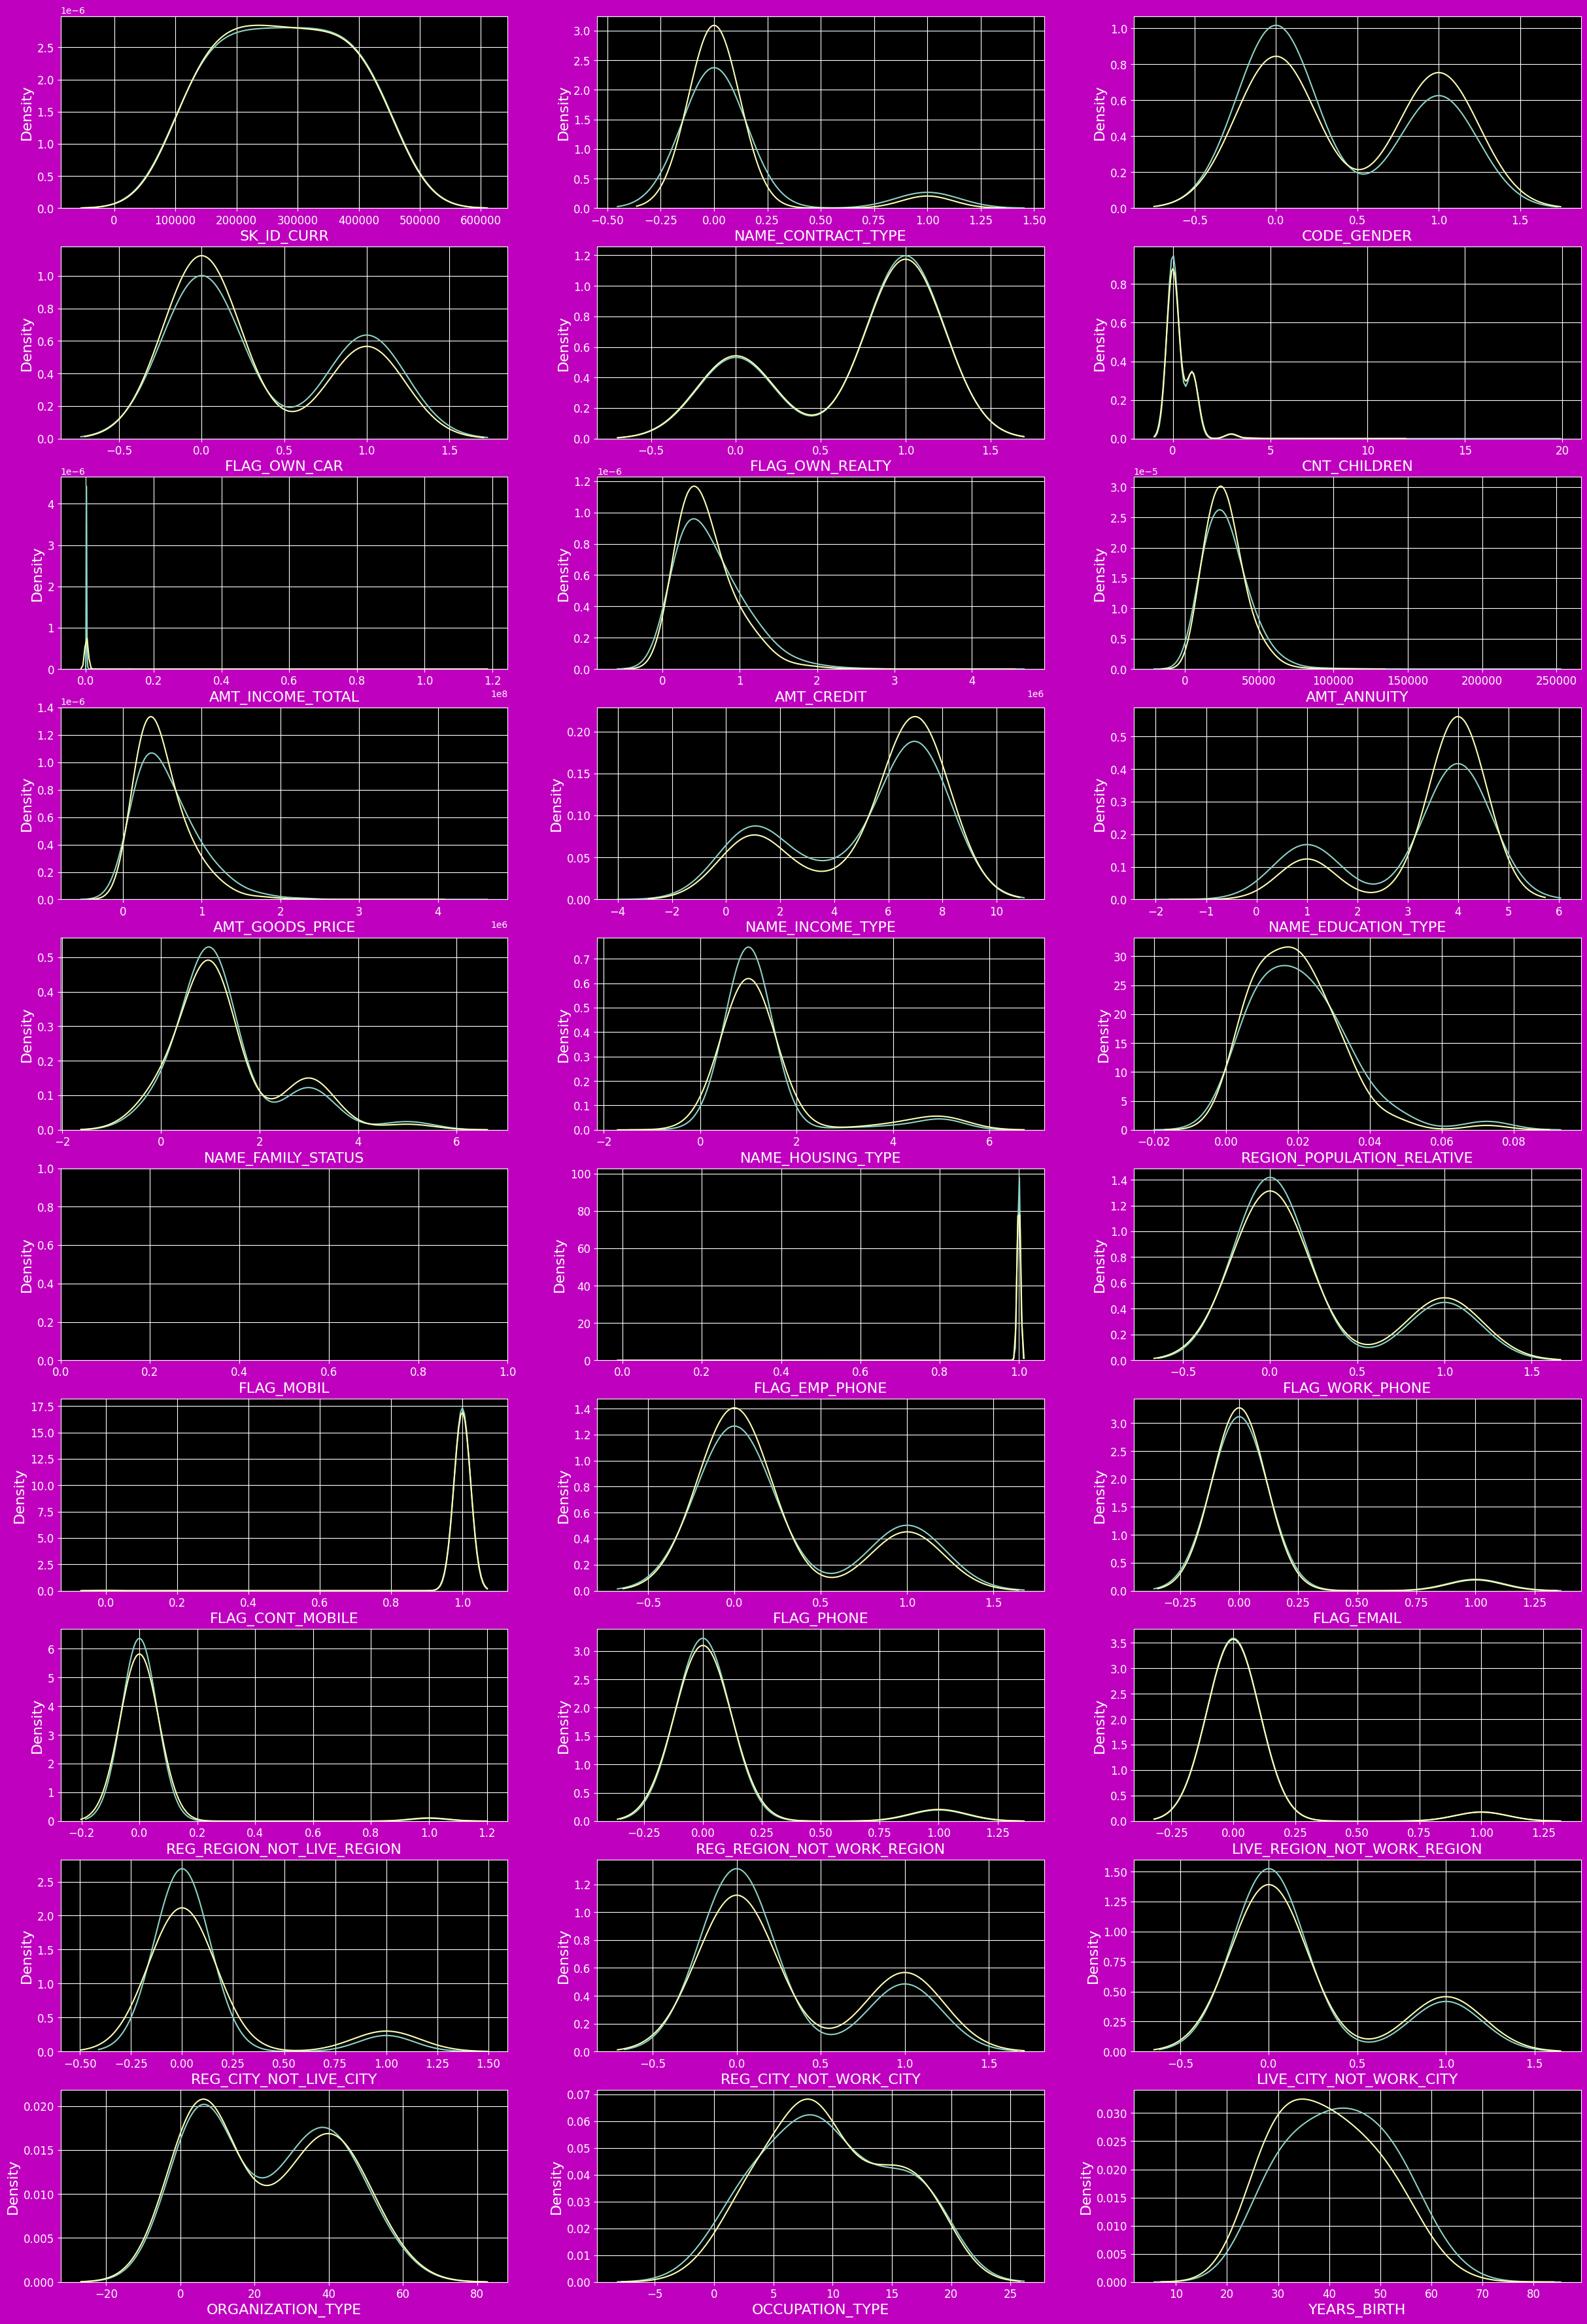

In [18]:
"""
Visualize the distribution of variables in a DataFrame using density plots.

Notes:
------
This function creates a grid of density plots using seaborn's kdeplot() function. The grid is structured as 10 rows
and 3 columns to accommodate all the variables in the input DataFrame. The TARGET column is excluded from the list
of variables to be plotted.

The data is first separated by TARGET into two subsets, t0 and t1, using the loc() method on the DataFrame. The
subsets are then plotted using kdeplot() with a bandwidth of 0.5 to estimate the density function. The two subsets
are distinguished by different colors.

The x-axis labels for each plot are set to the name of the corresponding variable using plt.xlabel(). The x-axis
ticks are adjusted using plt.xticks() to better fit the labels. The tick labels and font size can be adjusted using
plt.tick_params().

The grid is displayed using plt.show().
"""

# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping TARGET columns from the list
var.remove("TARGET")

i = 0
t0 = df.loc[df['TARGET'] == 0]
t1 = df.loc[df['TARGET'] == 1]

with plt.style.context('dark_background'):

    plt.figure()
    fig, ax = plt.subplots(10,3,figsize=(30,45), facecolor='m');

    for feature in var:
        i += 1
        plt.subplot(10,3,i)
        sns.kdeplot(t0[feature], bw=0.5,label="0")
        sns.kdeplot(t1[feature], bw=0.5,label="1")
        plt.xlabel(feature, fontsize=16)
        plt.ylabel("Density", fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.grid()
    plt.show()

# **Splitting the data into train & test data**

In [19]:
# y= #class variable
X = df.drop("TARGET", axis = 1)
y= df["TARGET"]
y.shape,X.shape

((165100,), (165100, 31))

In [20]:
# from sklearn import model_selection
# X_train, X_test, y_train, y_test =

"""
This code is using the train_test_split() function from scikit-learn to split the dataset X and its corresponding labels y into training and testing sets. The split is done with a 80/20 ratio for the test set and the random state is set to 42 for reproducibility.
The stratify parameter is set to y, which means that the split is done in a way that preserves the proportion of samples for each class in y in the training and testing sets.
The resulting output of this code is a tuple containing the shape of the training set (X_train and y_train) and the shape of the testing set (X_test and y_test).
The train_test_split() function is commonly used in machine learning to split a dataset into training and testing sets to evaluate the performance of a model on unseen data.
The training set is used to fit the model while the testing set is used to evaluate the model's performance on new, unseen data.
"""

# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132080, 31), (33020, 31), (132080,), (33020,))

In [21]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  13586.0
Fraudulent Count for Train data :  10869.0
 Fraudulent Count for Test data :  2717.0


#### Preserve X_test & y_test to evaluate on the test data once you build the model

In [22]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


In [23]:
X_train.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OCCUPATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
94305,209501.0,0.0,0.0,0.0,0.0,0.0,193500.0,1350000.0,51421.5,1350000.0,...,0.0,1.0,1.0,0.0,1.0,1.0,51.0,14.0,53.0,13.0
142535,265271.0,0.0,0.0,0.0,1.0,0.0,90000.0,273636.0,26784.0,247500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,61.0,8.0
285408,430546.0,0.0,0.0,1.0,1.0,0.0,180000.0,582804.0,29884.5,463500.0,...,0.0,0.0,0.0,1.0,0.0,1.0,42.0,10.0,34.0,3.0
127113,247415.0,0.0,0.0,0.0,0.0,1.0,135000.0,760225.5,30150.0,679500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53.0,8.0,37.0,11.0
287839,433435.0,0.0,1.0,0.0,1.0,0.0,180000.0,571446.0,18562.5,477000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,18.0,38.0,18.0


In [24]:

X_test.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OCCUPATION_TYPE,YEARS_BIRTH,YEARS_EMPLOYED
197787,329316.0,0.0,0.0,0.0,0.0,0.0,180000.0,328405.5,21361.5,283500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,51.0,14.0,34.0,4.0
32955,138196.0,1.0,1.0,1.0,1.0,0.0,215487.0,135000.0,6750.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,45.0,9.0
118180,237037.0,0.0,0.0,0.0,0.0,0.0,85500.0,305640.0,32224.5,270000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39.0,10.0,30.0,5.0
123217,242886.0,0.0,0.0,1.0,1.0,0.0,135000.0,225000.0,18040.5,225000.0,...,0.0,1.0,1.0,0.0,1.0,1.0,5.0,18.0,32.0,3.0
60987,170726.0,0.0,1.0,1.0,0.0,0.0,164898.0,239850.0,22554.0,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,18.0,26.0,1.0


#Treating Skewness
**If there is skewness present in the distribution use:**
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [25]:
"""
In scikit-learn's PowerTransformer class, the copy parameter specifies whether to make a copy of the input data before applying
the transformation or not. By default, copy is set to True, which means that the input data is copied to a new object before applying
the transformation.

The preprocessing.PowerTransformer() function is used to transform the data to have a more Gaussian-like distribution.
Here, we are applying the transformation to the features that have a skewness greater than 1 or less than -1.

Both methods (yeo-johnson and box-cox) are commonly used to transform data to make it more normally distributed,
which can improve the performance of some machine learning algorithms.

The yeo-johnson method is an extension of the box-cox method that allows for transformation of variables with negative values,
while the box-cox method only works with variables that are strictly positive.
Therefore, if you have variables with negative values, yeo-johnson would be the appropriate choice.

This is a safety measure to ensure that the original input data is not modified in place.
If copy is set to False, the transformation is applied directly to the input data and any changes made to the transformed data will
also be reflected in the original data.
In general, it is recommended to keep copy=True unless you have a specific reason to modify the original data in place.

fit_transform is used for both fitting the transformer to the training data and transforming the data,
while transform is used only for transforming new data based on a previously fitted transformer.
"""
from sklearn import preprocessing
# หรือเฉพาะบางฟังก์ชันเฉพาะ
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [26]:
print(X_train_pt.shape)
print(y_train_pt.shape)

(132080, 31)
(132080,)


ValueError: ignored

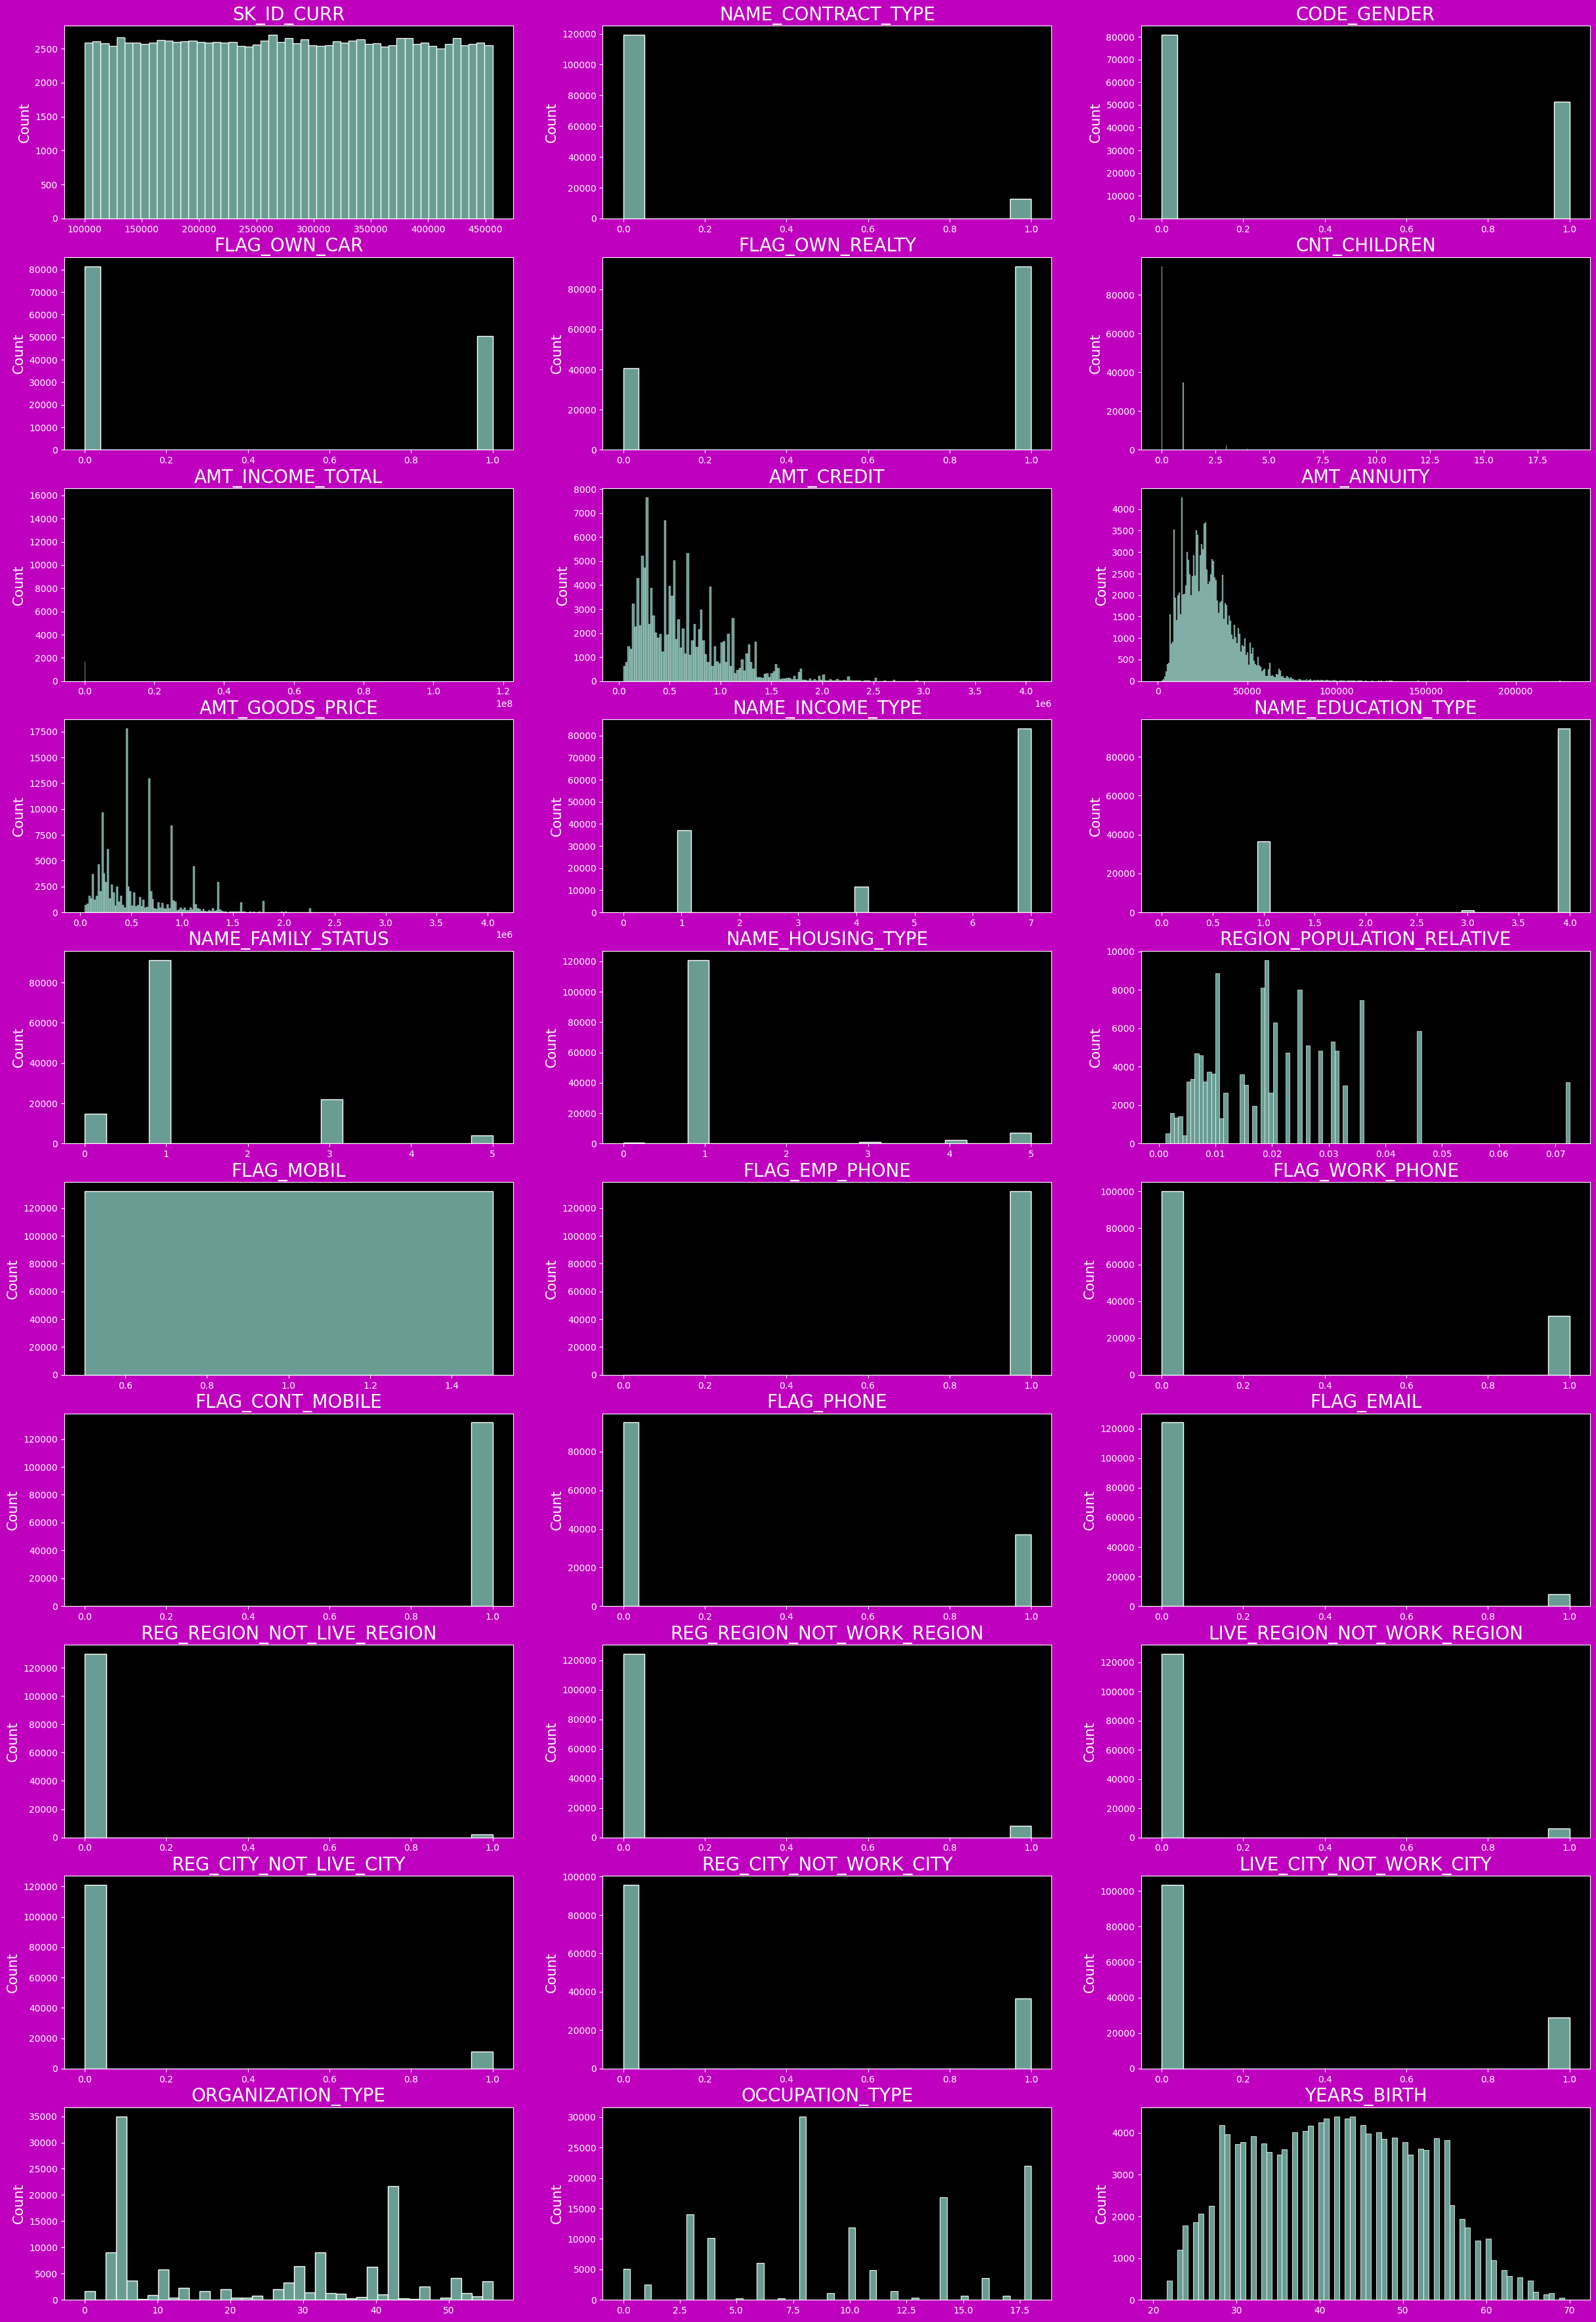

In [27]:
var = X_train.columns
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(30,45), facecolor='m') # create figure instance
    # fig.suptitle('Histograms of Variables', fontsize=30) # set main title of the figure
    i=0
    for col in var:
        i += 1
        ax = fig.add_subplot(10,3, i) # create subplot
        sns.histplot(X_train[col], ax=ax) # plot histogram
        ax.set_title(col, fontsize=20) # set title of the subplot
        ax.set_ylabel('Count', fontsize=15) # set ylabel of the subplot
        ax.set_xlabel('') # set empty string as x label of the subplot
    fig.subplots_adjust(hspace=0.5, wspace=0.2) # add horizontal and vertical space between subplots
    plt.show()

* เมื่อข้อมูลไม่สมดุลหรือน้อยกว่า ควรใช้ K-Fold Cross Validation เพื่อประเมินประสิทธิภาพเมื่อชุดข้อมูลถูกสุ่มแบ่งออกเป็นกลุ่ม 'k'
* การตรวจสอบความถูกต้องข้าม K-Fold แบบแบ่งชั้นเป็นส่วนขยายของการตรวจสอบความถูกต้องข้าม K-Fold ซึ่งคุณจัดเรียงข้อมูลใหม่เพื่อให้แน่ใจว่าแต่ละพับเป็นตัวแทนที่ดีของชั้นข้อมูลทั้งหมด

# **Feature transformations with ensembles of trees**

In [28]:
X_train_ensemble, X_train_linear, y_train_ensemble, y_train_linear = X_train, X_test, y_train, y_test

In [29]:
n_estimators = [10, 20, 50, 100]
max_depth = [10, 20, 50, 100, 300, 500]

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=100, max_depth=50, random_state=42
)
random_forest.fit(X_train_ensemble, y_train_ensemble)

gradient_boosting = GradientBoostingClassifier(
    n_estimators=100, max_depth=50, random_state=42
)
_ = gradient_boosting.fit(X_train_ensemble, y_train_ensemble)

In [31]:
from sklearn.ensemble import RandomTreesEmbedding

random_tree_embedding = RandomTreesEmbedding(
    n_estimators=100, max_depth=50, random_state=42
)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=100))
rt_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('randomtreesembedding',
                 RandomTreesEmbedding(max_depth=50, random_state=42)),
                ('logisticregression', LogisticRegression())])

In [33]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def rf_apply(X, model):
    return model.apply(X)


rf_leaves_yielder = FunctionTransformer(rf_apply, kw_args={"model": random_forest})

rf_model = make_pipeline(
    rf_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=100),
)
rf_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function rf_apply at 0x7d8e9cb923b0>,
                                     kw_args={'model': RandomForestClassifier(max_depth=50,
                                                                              random_state=42)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression())])

In [34]:
#ผลลัพธ์ของ gbdt_model คือโมเดลแบบประสานงานที่สามารถใช้ในการทำนายผลลัพธ์ของข้อมูล
#ในรูปแบบที่แปลงใบของต้นไม้จาก GBDT ให้กลายเป็นตัวแปรดัมมีและนำมาใช้กับ Logistic Regression ในการทำนาย
def gbdt_apply(X, model):
    return model.apply(X)[:, :, 0]


gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

gbdt_model = make_pipeline(
    gbdt_leaves_yielder,
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(max_iter=100),
)
gbdt_model.fit(X_train_linear, y_train_linear)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function gbdt_apply at 0x7d8e9cb92050>,
                                     kw_args={'model': GradientBoostingClassifier(max_depth=50,
                                                                                  random_state=42)})),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('logisticregression', LogisticRegression())])

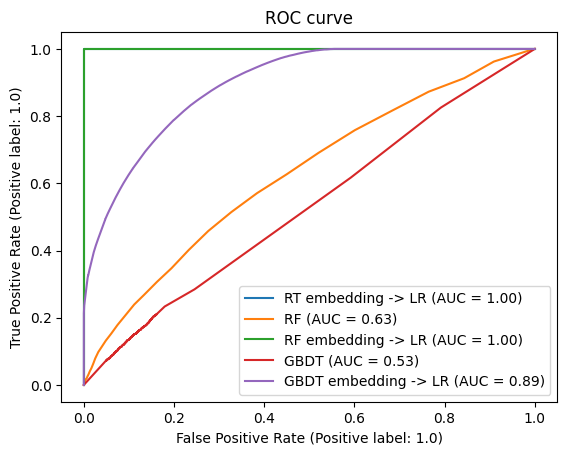

In [35]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

models = [
    ("RT embedding -> LR", rt_model),
    ("RF", random_forest),
    ("RF embedding -> LR", rf_model),
    ("GBDT", gradient_boosting),
    ("GBDT embedding -> LR", gbdt_model),
]

model_displays = {}
for name, pipeline in models:
    model_displays[name] = RocCurveDisplay.from_estimator(
        pipeline, X_test, y_test, ax=ax, name=name
    )
_ = ax.set_title("ROC curve")


---
**โค้ดแสดงวิธีการวาดเส้นโค้ง ROC**

AUC = 1: โมเดลมีประสิทธิภาพสูงมากที่สุดในการจำแนกคลาส

AUC > 0.5: โมเดลมีประสิทธิภาพในการจำแนกคลาสดีกว่าการทายสุ่ม

AUC = 0.5: โมเดลไม่มีประสิทธิภาพในการจำแนกคลาสและเทียบเท่ากับการทายสุ่ม

AUC < 0.5: โมเดลมีประสิทธิภาพในการจำแนกคลาสที่แย่กว่าการทายสุ่ม
  

**มี 2 Modelที่ AUC = 1 มีประสิทธิภาพสูงในการจำแนกคลาส**

*   RT embedding -> LR [ใช้ RandomTreesEmbedding (RT) เพื่อแปลงคุณลักษณะ (features) ของข้อมูลเป็นรูปแบบใหม่ และใช้ Logistic Regression เพื่อจำแนกคลาส]

*   RF embedding -> LR [ใช้ Random Forest (RF) การแปลงคุณลักษณะข้อมูล และ Logistic Regression ในกระบวนการการทำนายด้วยหลายขั้นตอน]

**Model ที่มีประสิทธิภาพรองลงมาก็ คือ**

*   GBDT embedding -> LR [โมเดลแบบประสานงานที่สามารถใช้ในการทำนายผลลัพธ์ของข้อมูล
ในรูปแบบที่แปลงใบของต้นไม้จาก GBDT ให้กลายเป็นตัวแปรดัมมีและนำมาใช้กับ Logistic Regression ในการทำนาย]

**Model ที่มีประสิทธิดีกว่าการทายสุ่มมาเล็กน้อย คือ**


*   random_forest
*   gradient_boosting




---





# Model Building with imbalanced data

---


We will build the model using the algorithm mentioned above. And we will compare the best models. :

1. Logistic Regression
2. XGBoost
3. KNN Classifier

## `1. Logistic Regression`

### RandomTreesEmbedding

In [36]:
# สร้าง RandomTreesEmbedding
random_tree_embedding = RandomTreesEmbedding(n_estimators=100, max_depth=50, random_state=42)

# สร้างโมเดลโดยรวม RandomTreesEmbedding และ Logistic Regression ใน pipeline
rt_model = make_pipeline(random_tree_embedding, LogisticRegression(max_iter=100))

# ฝึก (train) โมเดล
rt_model.fit(X_train_linear, y_train_linear)

# ทำนายผลลัพธ์
y_pred = rt_model.predict(X_test)

# ประเมินความสามารถในการจำแนกคลาสของโมเดล
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print("F2 Score:", f2)
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", report)

F2 Score: 1.0
Accuracy: 1.0
ROC AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30303
         1.0       1.00      1.00      1.00      2717

    accuracy                           1.00     33020
   macro avg       1.00      1.00      1.00     33020
weighted avg       1.00      1.00      1.00     33020





---


**Accuracy of model with imbalanced data**

---



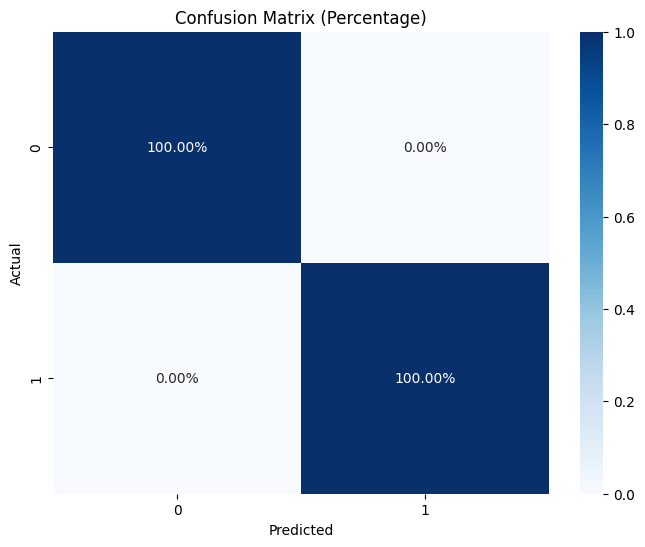

In [37]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### RandomForestClassifier

In [38]:
from sklearn.base import TransformerMixin

class RandomForestTransformer(TransformerMixin):
    def __init__(self, random_forest):
        self.random_forest = random_forest

    def fit(self, X, y):
        self.random_forest.fit(X, y)
        return self

    def transform(self, X):
        return self.random_forest.apply(X)

# Create a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Create a transformer that applies the Random Forest
rf_transformer = RandomForestTransformer(random_forest)

# Create a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=100)

# Create a pipeline with the Random Forest transformer and Logistic Regression
pipeline = make_pipeline(rf_transformer, logistic_regression)

# Fit the pipeline on your data
pipeline.fit(X_train, y_train)

# ทำการทดสอบ (evaluate) แบบจำลองของคุณ
y_pred_RF = pipeline.predict(X_test)

In [39]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision_RF = precision_score(y_test, y_pred_RF)

# คำนวณค่าความ recall
recall_RF = recall_score(y_test, y_pred_RF)

# คำนวณค่า F1 score
f1_RF = f1_score(y_test, y_pred_RF)

# คำนวณค่า F2 score
f2_RF = fbeta_score(y_test, y_pred_RF, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba_RF = pipeline.predict_proba(X_test)[:, 1]
roc_auc_RF = roc_auc_score(y_test, y_pred_proba_RF)

print("Accuracy:", accuracy_RF)
print("Precision:", precision_RF)
print("Recall:", recall_RF)
print("F1 Score:", f1_RF)
print("F2 Score:", f2_RF)
print("ROC AUC Score:", roc_auc_RF)


Accuracy: 0.9177165354330709
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
F2 Score: 0.0
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



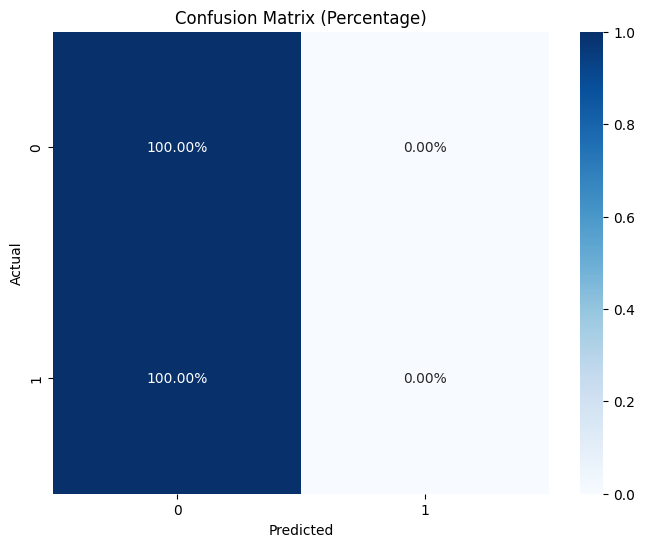

In [40]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_RF)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting Decision Trees (GBDT)

In [54]:
# สร้างและฝึกโมเดล Gradient Boosting Decision Trees (GBDT)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# สร้างท่อการประมวลผล (pipeline) ที่รวมการแปลงใบของต้นไม้จาก GBDT เป็นตัวแปรดัมมีและการใช้ Logistic Regression
model = make_pipeline(
    FunctionTransformer(gbdt_apply, kw_args={"model": gradient_boosting}),
    LogisticRegression(max_iter=100)
)

# ฝึกโมเดลและทำนายผลลัพธ์
model.fit(X_train, y_train)
y_pred_LGBDT = model.predict(X_test)

In [55]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy_LGBDT = accuracy_score(y_test, y_pred_LGBDT)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision_LGBDT = precision_score(y_test, y_pred_LGBDT)

# คำนวณค่าความ recall
recall_LGBDT = recall_score(y_test, y_pred_LGBDT)

# คำนวณค่า F1 score
f1_LGBDT = f1_score(y_test, y_pred_LGBDT)

# คำนวณค่า F2 score
f2_LGBDT = fbeta_score(y_test, y_pred_LGBDT, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc_LGBDT = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy_LGBDT)
print("Precision:", precision_LGBDT)
print("Recall:", recall_LGBDT)
print("F1 Score:", f1_LGBDT)
print("F2 Score:", f2_LGBDT)
print("ROC AUC Score:", roc_auc_LGBDT)

Accuracy: 0.9176862507571169
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
F2 Score: 0.0
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



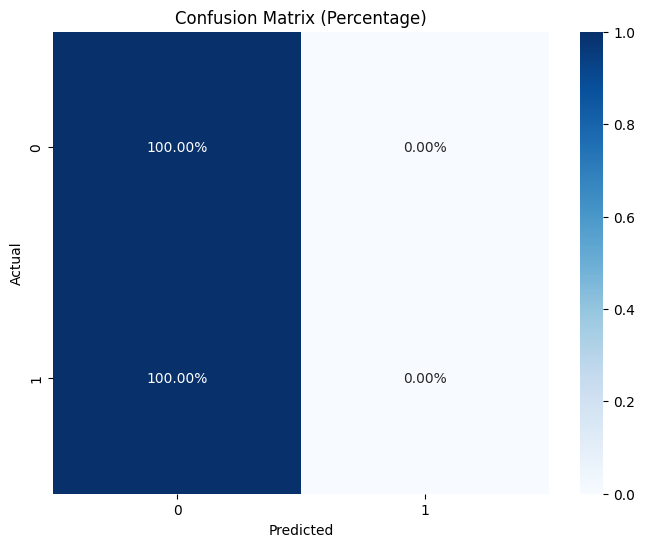

In [56]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LGBDT)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## `2. XGBoost`


### RandomTreesEmbedding

In [41]:
# สร้างและฝึกโมเดล Random Trees Embedding (RTE)
rte = RandomTreesEmbedding(n_estimators=100, random_state=42)
X_train_transformed = rte.fit_transform(X_train)
X_test_transformed = rte.transform(X_test)

# สร้างและฝึกโมเดล XGBoost โดยใช้คุณลักษณะที่แปลงแล้ว
xgb_model = XGBClassifier()
xgb_model.fit(X_train_transformed, y_train)

# ทำนายคลาสโดยใช้โมเดล XGBoost
y_pred = xgb_model.predict(X_test_transformed)


# คำนวณค่าความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)  # สำหรับ classification

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision = precision_score(y_test, y_pred)

# คำนวณค่าความ recall
recall = recall_score(y_test, y_pred)

# คำนวณค่า F1 score
f1 = f1_score(y_test, y_pred)

# คำนวณค่า F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.917655966081163
Precision: 0.42857142857142855
Recall: 0.002208317997791682
F1 Score: 0.004393994873672648
F2 Score: 0.0027568461679838272
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



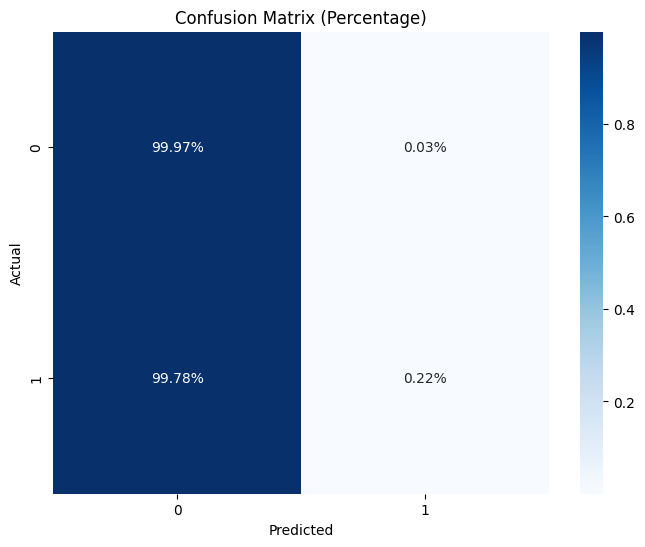

In [42]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### RandomForestClassifier

In [43]:
# สร้างและฝึกโมเดล Random Trees Embedding (RTE)
rte = RandomTreesEmbedding(n_estimators=100, random_state=42)
X_train_transformed = rte.fit(X_train).transform(X_train)
X_test_transformed = rte.transform(X_test)

# สร้างและฝึกโมเดล XGBoost โดยใช้คุณลักษณะที่แปลงแล้ว
xgb_model = XGBClassifier()
xgb_model.fit(X_train_transformed, y_train)

# ทำนายคลาสโดยใช้โมเดล XGBoost
y_pred = xgb_model.predict(X_test_transformed)


# คำนวณค่าความแม่นยำหรือค่า MSE (Mean Squared Error)
accuracy = accuracy_score(y_test, y_pred)  # สำหรับ classification

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision = precision_score(y_test, y_pred)

# คำนวณค่าความ recall
recall = recall_score(y_test, y_pred)

# คำนวณค่า F1 score
f1 = f1_score(y_test, y_pred)

# คำนวณค่า F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.917655966081163
Precision: 0.42857142857142855
Recall: 0.002208317997791682
F1 Score: 0.004393994873672648
F2 Score: 0.0027568461679838272
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



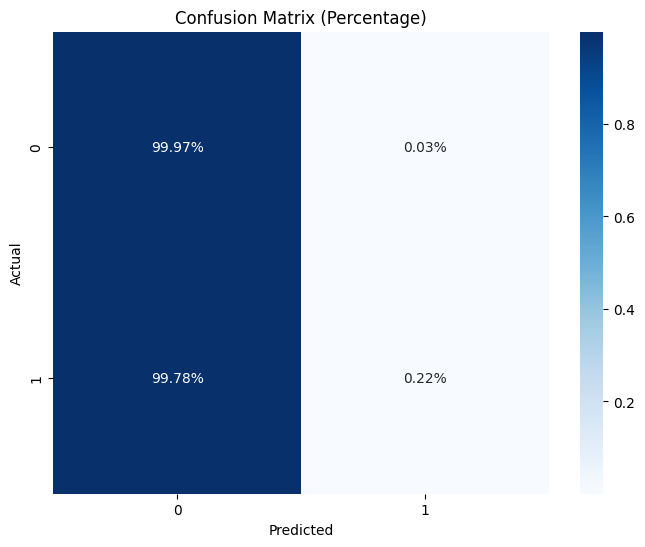

In [44]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting Decision Trees (GBDT)

In [57]:
# สร้างและฝึกโมเดล Gradient Boosting Decision Trees (GBDT)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# สร้างและฝึกโมเดล GBDT โดยใช้การแปลงข้อมูลในรูปแบบของลูกใบของต้นไม้
gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

# สร้างและฝึกโมเดล XGBoost ด้วยข้อมูลที่แปลงแล้วจาก GBDT (ในรูปแบบของลูกใบของต้นไม้)
xgb_model = XGBClassifier()
xgb_model.fit(gbdt_leaves_yielder.transform(X_train), y_train)

# ทำนายผลลัพธ์โดยใช้โมเดล XGBoost และข้อมูลที่แปลงจาก GBDT
y_pred_XGBDT = xgb_model.predict(gbdt_leaves_yielder.transform(X_test))

In [58]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy_XGBDT = accuracy_score(y_test, y_pred_XGBDT)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision_XGBDT = precision_score(y_test, y_pred_XGBDT)

# คำนวณค่าความ recall
recall_XGBDT = recall_score(y_test, y_pred_XGBDT)

# คำนวณค่า F1 score
f1_XGBDT = f1_score(y_test, y_pred_XGBDT)

# คำนวณค่า F2 score
f2_XGBDT = fbeta_score(y_test, y_pred_XGBDT, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc_XGBDT = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy_XGBDT)
print("Precision:", precision_XGBDT)
print("Recall:", recall_XGBDT)
print("F1 Score:", f1_XGBDT)
print("F2 Score:", f2_XGBDT)
print("ROC AUC Score:", roc_auc_XGBDT)

Accuracy: 0.9172925499697153
Precision: 0.15
Recall: 0.001104158998895841
F1 Score: 0.0021921812203142127
F2 Score: 0.0013776634827332847
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



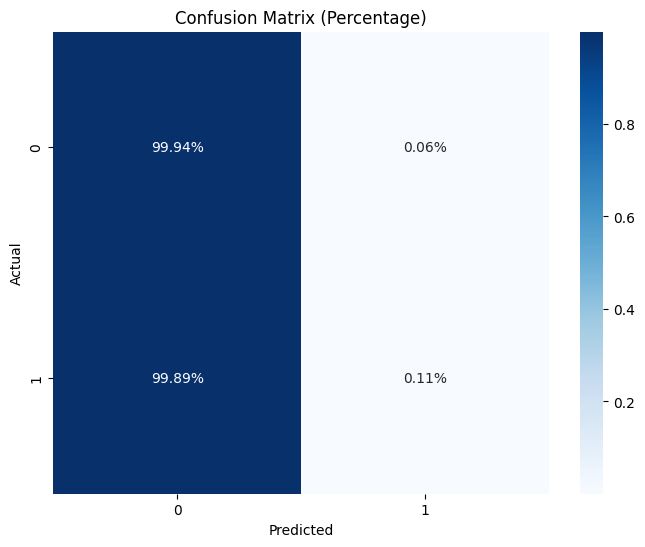

In [59]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_XGBDT)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## `3. KNN Classifier`


### RandomTreesEmbedding

In [45]:
# Create and train the Random Forest (RF) model for feature transformation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Transform the features using RF
X_train_transformed = rf_model.apply(X_train)
X_test_transformed = rf_model.apply(X_test)

# Create and train the K-Nearest Neighbors (KNN) classifier using the transformed features
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_transformed, y_train)

# Make predictions using the KNN model
y_pred = knn_model.predict(X_test_transformed)

In [46]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision = precision_score(y_test, y_pred)

# คำนวณค่าความ recall
recall = recall_score(y_test, y_pred)

# คำนวณค่า F1 score
f1 = f1_score(y_test, y_pred)

# คำนวณค่า F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9111750454270139
Precision: 0.17073170731707318
Recall: 0.020610967979389033
F1 Score: 0.036781609195402305
F2 Score: 0.02500893176134334
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



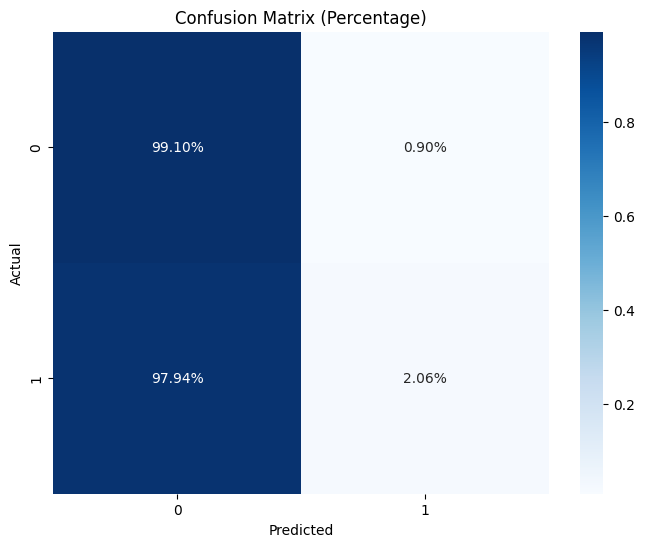

In [47]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### RandomTreesEmbedding

In [48]:
# Create and train the Random Forest (RF) model for feature transformation
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Transform the features using RF
X_train_transformed = rf_model.apply(X_train)
X_test_transformed = rf_model.apply(X_test)

# Create and train the K-Nearest Neighbors (KNN) classifier using the transformed features
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_transformed, y_train)

# Make predictions using the KNN model
y_pred = knn_model.predict(X_test_transformed)

In [49]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision = precision_score(y_test, y_pred)

# คำนวณค่าความ recall
recall = recall_score(y_test, y_pred)

# คำนวณค่า F1 score
f1 = f1_score(y_test, y_pred)

# คำนวณค่า F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("F2 Score:", f2)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9111750454270139
Precision: 0.17073170731707318
Recall: 0.020610967979389033
F1 Score: 0.036781609195402305
F2 Score: 0.02500893176134334
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



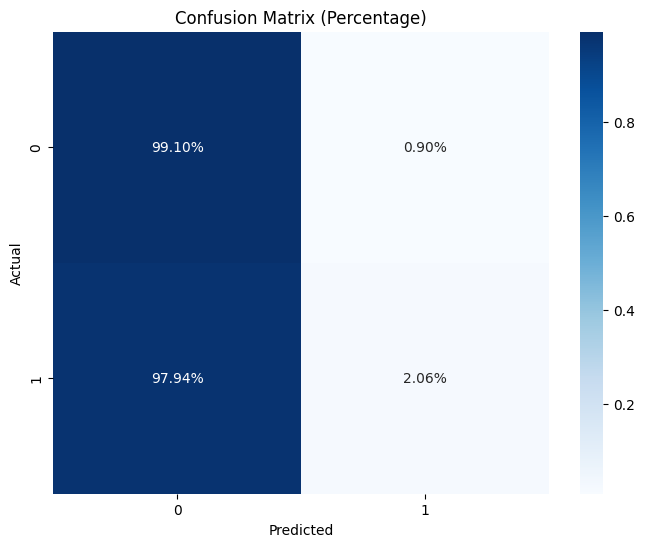

In [50]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Gradient Boosting Decision Trees (GBDT)

In [64]:
# สร้างและฝึกโมเดล Gradient Boosting Decision Trees (GBDT)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)

# สร้างและฝึกโมเดล GBDT โดยใช้การแปลงข้อมูลในรูปแบบของลูกใบของต้นไม้
gbdt_leaves_yielder = FunctionTransformer(
    gbdt_apply, kw_args={"model": gradient_boosting}
)

# สร้างและฝึกโมเดล K-Nearest Neighbors (KNN) ด้วยข้อมูลที่แปลงแล้ว
knn_model = KNeighborsClassifier(n_neighbors=5)  # คุณสามารถปรับเป็นจำนวนเพื่อบอกจำนวนของบริบที่ใกล้ที่สุด
knn_model.fit(gbdt_leaves_yielder.transform(X_train), y_train)

# ทำนายคลาสโดยใช้โมเดล KNN และข้อมูลที่แปลงแล้ว
y_pred_KGBDT = knn_model.predict(gbdt_leaves_yielder.transform(X_test))


In [65]:
# คำนวณค่าความแม่นยำ (accuracy)
accuracy_KGBDT = accuracy_score(y_test, y_pred_KGBDT)

# คำนวณค่าความแม่นยำทางกายภาพ (precision)
precision_KGBDT = precision_score(y_test, y_pred_KGBDT)

# คำนวณค่าความ recall
recall_KGBDT = recall_score(y_test, y_pred_KGBDT)

# คำนวณค่า F1 score
f1_KGBDT = f1_score(y_test, y_pred_KGBDT)

# คำนวณค่า F2 score
f2_KGBDT = fbeta_score(y_test, y_pred_KGBDT, beta=2)

# คำนวณค่า ROC AUC score
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc_KGBDT = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy_KGBDT)
print("Precision:", precision_KGBDT)
print("Recall:", recall_KGBDT)
print("F1 Score:", f1_KGBDT)
print("F2 Score:", f2_KGBDT)
print("ROC AUC Score:", roc_auc_KGBDT)

Accuracy: 0.9113567534827377
Precision: 0.17791411042944785
Recall: 0.021347073978652927
F1 Score: 0.03812027604337825
F2 Score: 0.02590673575129534
ROC AUC Score: 0.6448225638509039




---


**Accuracy of model with imbalanced data**

---



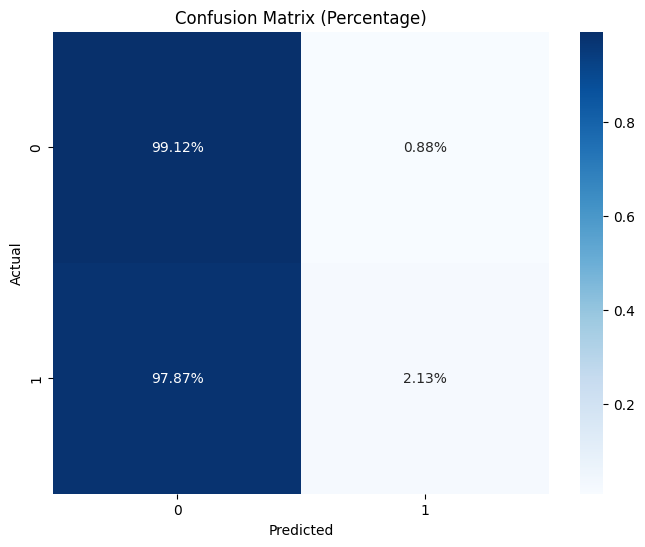

In [66]:
# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_KGBDT)

# แสดงในรูปแบบเปอร์เซ็น
plt.figure(figsize=(8, 6))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", cmap="Blues")
plt.title("Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



---


# **synopsis**


---



1.  อัลกอรึทึมที่ใช้ในการ features มี 3 วิธี

  *   RandomTreesEmbedding (RT)

  *   Random Forest (RF)
  *   GBDT (Gradient Boosting Decision Trees)




2.   อัลกอริธึมที่ใช้ในการทำ Classification มี 3 วิธี

  *   Logistic Regression
  *   XGBoost
  *   KNN Classifier

---

**วิธีที่ดีที่สุดคือ** การเลือก featuresแบบ RandomTreesEmbedding (RT) และ ทำ Classification ด้วยวิธี Logistic Regression

**ที่ให้ค่่า** F2 Score <d> มากถึง 1.00







